In [1]:
import numpy as np
import pandas as pd

In [2]:
import keras
import tensorflow as tf

Using TensorFlow backend.
D:\Dev\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Dev\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Dev\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Dev\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (ty

In [15]:
data = pd.read_csv('drug_consumption.data')

In [16]:
work_data = data.drop(['Country', 'Ethnicity', 'ID'], axis=1)
work_data.columns

Index(['Age', 'Gender', 'Education', 'Nscore', 'Escore', 'Oscore', 'Ascore',
       'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos',
       'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin',
       'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer',
       'VSA'],
      dtype='object')

In [24]:
drugs_list = ['Alcohol',  'Nicotine','Caff', 'Choc','Amphet', 'Amyl', 'Benzos',
       'Cannabis',  'Coke', 'Crack', 'Ecstasy', 'Heroin',
       'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Semer',
       'VSA']
N_drugs = len(drugs_list)

In [25]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameToNumPy(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, Х, y=None):
        return self
    
    def transform(self, Х):
        return X[self.attribute_names].values

def apply_pipeline(datas, num_attributes, cat_attributes, encoder='ordinal'):
    X = datas
    
    num_data_pipeline = Pipeline([
        ('selector', DataFrameToNumPy(num_attributes)),
    ])
    
    OrdEncoder =  OrdinalEncoder()
    OrdEncoder.fit([['CL0','CL1','CL2','CL3','CL4','CL5','CL6']*N_drugs])
    cat_data_pipeline = Pipeline([
        ('select', DataFrameToNumPy(cat_attributes)),
        ('cat_encode',OrdEncoder),
    ])

    all_together = FeatureUnion(transformer_list=[
        ('num_pipe', num_data_pipeline),
        ('cat_pipe', cat_data_pipeline),
    ])

    
    return all_together.fit_transform(datas)
 
    
num_attributes = ['Age', 'Gender', 'Education',  
                  'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'] #c учетом психологических тестов

cat_attributes = drugs_list
X = work_data
prepared_data = apply_pipeline(data, num_attributes, cat_attributes)

print(prepared_data[0])
work_data.loc(0)[0]

[ 0.49788  0.48246 -0.05921  0.31287 -0.57545 -0.58331 -0.91699 -0.00665
 -0.21712 -1.18084  5.       2.       6.       5.       2.       0.
  2.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.     ]


Age          0.49788
Gender       0.48246
Education   -0.05921
Nscore       0.31287
Escore      -0.57545
Oscore      -0.58331
Ascore      -0.91699
Cscore      -0.00665
Impulsive   -0.21712
SS          -1.18084
Alcohol          CL5
Amphet           CL2
Amyl             CL0
Benzos           CL2
Caff             CL6
Cannabis         CL0
Choc             CL5
Coke             CL0
Crack            CL0
Ecstasy          CL0
Heroin           CL0
Ketamine         CL0
Legalh           CL0
LSD              CL0
Meth             CL0
Mushrooms        CL0
Nicotine         CL2
Semer            CL0
VSA              CL0
Name: 0, dtype: object

In [26]:
columns_for_df = work_data.columns
prepared_data_df = pd.DataFrame(prepared_data, columns = columns_for_df)

corr_matrix = prepared_data_df.corr()
corr_matrix['Meth'].sort_values()

Age         -0.323207
Gender      -0.278983
Education   -0.177817
Cscore      -0.160699
Ascore      -0.093888
Benzos      -0.078222
Amyl        -0.004510
Alcohol      0.012123
Escore       0.018166
Nscore       0.037095
Semer        0.071252
Cannabis     0.161425
Impulsive    0.229205
Ecstasy      0.230271
Mushrooms    0.266792
Ketamine     0.279543
VSA          0.286189
Amphet       0.292235
Choc         0.302735
SS           0.365536
Oscore       0.369759
Crack        0.384027
Legalh       0.409933
Caff         0.419616
LSD          0.471942
Coke         0.521048
Heroin       0.570946
Nicotine     0.668627
Meth         1.000000
Name: Meth, dtype: float64

In [23]:
#corr_matrix.sort_values()
s = corr_matrix.unstack()
so = s.sort_values(kind="quicksort")

In [9]:
so.head(20)

Cannabis   Age         -0.446846
Age        Cannabis    -0.446846
Nscore     Escore      -0.431051
Escore     Nscore      -0.431051
Age        Legalh      -0.419839
Legalh     Age         -0.419839
Nscore     Cscore      -0.391088
Cscore     Nscore      -0.391088
Ecstasy    Age         -0.384784
Age        Ecstasy     -0.384784
Impulsive  Cscore      -0.335133
Cscore     Impulsive   -0.335133
SS         Age         -0.332188
Age        SS          -0.332188
           Mushrooms   -0.331456
Mushrooms  Age         -0.331456
Age        LSD         -0.323207
LSD        Age         -0.323207
Legalh     Gender      -0.315676
Gender     Legalh      -0.315676
dtype: float64

In [48]:
prepared_data_X = prepared_data[:, :-15]
prepared_data_y = prepared_data[:, -15:]

In [56]:
N = len(prepared_data_y)
dList = np.zeros(N)

In [76]:
for i, eli in enumerate(prepared_data_y):
    for j, elj in enumerate(eli):
        if elj > 2:
            dList[i] = 1

In [69]:
import collections
collections.Counter(dList)

Counter({0.0: 706, 1.0: 1179})

In [77]:
data_X = prepared_data_X
data_y = dList

In [78]:
#Проверка+разделение данных
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, multilabel_confusion_matrix, make_scorer, confusion_matrix

#Модели
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [88]:
#Подготовка hold-out(а)
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=13)

for train_index, test_index in stratified_split.split(dList,dList):
    train_X = data_X[train_index]
    train_y = data_y[train_index]
    test_X = data_X[test_index]
    test_y = data_y[test_index]

In [90]:
def PrintScores(y_test, y_pred):
    print(multilabel_confusion_matrix(y_test, y_pred))
    #TN FP
    #FN TP (c0, c1, ..., c6)

    f1_res_weighted = f1_score(y_test, y_pred, average='weighted')
    f1_res_allClasses = f1_score(y_test, y_pred, average=None)
    acc_res = accuracy_score(y_test, y_pred)
    prec_res = precision_score(y_test, y_pred, average='weighted')

    print('F1 взвешенный - {:.3f}'.format(f1_res_weighted))
    print('F1 по классам - ', f1_res_allClasses)
    print('accuracy - {:.3f}'.format(acc_res))
    print('precision - {:.3f}'.format(prec_res))
    return 0

In [98]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


def draw_roc_auc(real_data, pred_data, model_name='Keras'):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(real_data.reshape(-1), pred_data)
    auc_keras = auc(fpr_keras, tpr_keras)

    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label=(model_name + ' (area = {:.3f})').format(auc_keras))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    return 0

In [101]:
rand_forest = RandomForestClassifier()
perceptron = Perceptron()
lgbm_model = LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.1, n_estimators=3, max_depth=5,
                                bagging_fraction=0.9, feature_fraction=0.9, reg_lambda=0.2)
xgb_model = XGBClassifier()

rand_forest.fit(train_X, train_y)
perceptron.fit(train_X, train_y)
lgbm_model.fit(train_X, train_y)
xgb_model.fit(train_X, train_y)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[13:13:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Dev\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Dev\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

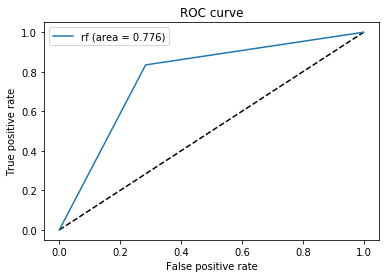

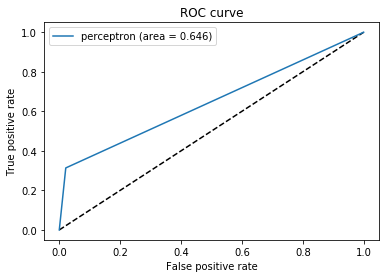

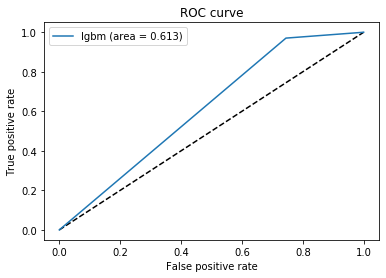

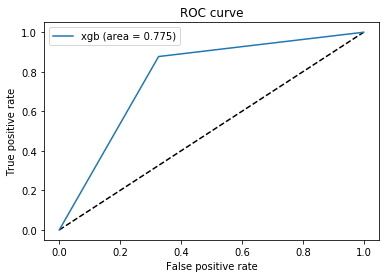

0

In [102]:
pred_y = rand_forest.predict(test_X)
draw_roc_auc(test_y, pred_y, model_name='rf')

pred_y = perceptron.predict(test_X)
draw_roc_auc(test_y, pred_y, model_name='perceptron')

pred_y = lgbm_model.predict(test_X)
draw_roc_auc(test_y, pred_y, model_name='lgbm')

pred_y = xgb_model.predict(test_X)
draw_roc_auc(test_y, pred_y, model_name='xgb')

In [104]:
parameters = {
    'n_estimators':[10, 20, 40, 70, 100],
    'criterion':('gini', 'entropy'),
    'max_depth':[3, 5, None],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 3, 7],
    'max_features':('sqrt', 'log2'),
    'random_state':[0]
}
f1scorer = make_scorer(f1_score, average='weighted') 
GSCV_randForest = GridSearchCV(rand_forest, parameters, scoring=f1scorer)

GSCV_randForest.fit(train_X, train_y)

rand_forest = GSCV_randForest.best_estimator_
pred_y = rand_forest.predict(test_X)

PrintScores(test_y, pred_y)

D:\Dev\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[[[215  21]
  [ 45  96]]

 [[ 96  45]
  [ 21 215]]]
F1 взвешенный - 0.821
F1 по классам -  [0.74418605 0.86693548]
accuracy - 0.825
precision - 0.825


0

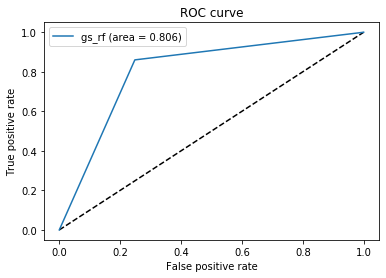

0

In [168]:
draw_roc_auc(test_y, pred_y, model_name='gs_rf')

In [107]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=(14,)),
    tf.keras.layers.Dense(30, activation = 'sigmoid'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]



sgd_opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

model.compile(optimizer=sgd_opt,
                      loss=['binary_crossentropy'],
                      metrics=metrics)
history = model.fit(train_X, train_y, epochs=200, verbose=0, validation_data=(test_X, test_y))
    
print('sgd')
print(model.evaluate(test_X,  test_y, verbose=2))
print('_____________')




sgd
377/377 - 0s - loss: 0.4187 - fn: 28880.1660 - fp: 30031.7500 - tn: 111243.1641 - tp: 207052.3281 - precision: 0.8733 - recall: 0.8776
[0.4186561570875841, 28880.166, 30031.75, 111243.164, 207052.33, 0.8733287, 0.87759143]
_____________


dict_keys(['loss', 'fn', 'fp', 'tn', 'tp', 'precision', 'recall', 'val_loss', 'val_fn', 'val_fp', 'val_tn', 'val_tp', 'val_precision', 'val_recall'])


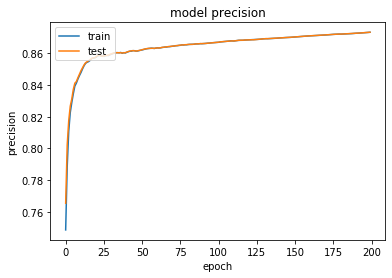

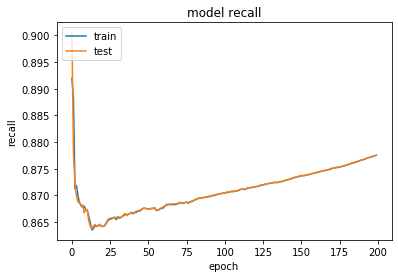

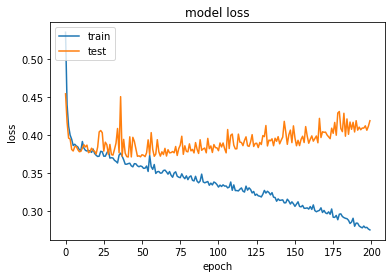

In [108]:
# list all data in history
print(history.history.keys())
# summarize history for precision
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

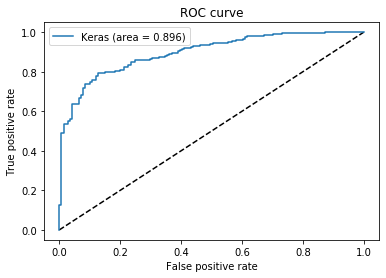

0

In [109]:
pred_y = model.predict(test_X)
draw_roc_auc(test_y, pred_y)

In [155]:
threshold = 0.625
pred_y = (model.predict_proba(test_X) >= threshold).astype(bool)
print(confusion_matrix(test_y, pred_y))

[[106  35]
 [ 33 203]]


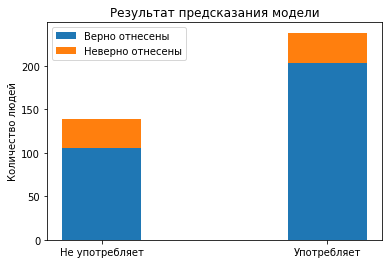

In [148]:
labels = ['Не употребляет', 'Употребляет']
#TP FN
#FP TN

true_labels = [106, 203]
false_labels = [33, 35]

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, true_labels, width,  label='Верно отнесены')
ax.bar(labels, false_labels, width, label='Неверно отнесены', bottom=true_labels)

ax.set_ylabel('Количество людей')
ax.set_title('Результат предсказания модели')
ax.legend()

plt.show()

[[466  99]
 [ 76 867]]


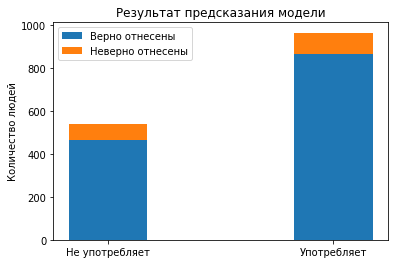

In [158]:
threshold = 0.5
pred_y_train = (model.predict_proba(train_X) >= threshold).astype(bool)
print(confusion_matrix(train_y, pred_y_train))

labels = ['Не употребляет', 'Употребляет']
#TN FP
#FN TP

true_labels = [466, 867]
false_labels = [76, 99]

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, true_labels, width,  label='Верно отнесены')
ax.bar(labels, false_labels, width, label='Неверно отнесены', bottom=true_labels)

ax.set_ylabel('Количество людей')
ax.set_title('Результат предсказания модели')
ax.legend()

plt.show()

In [169]:
f1_score(test_y, pred_y)

0.8565400843881856

In [164]:
466+99+106+35

706

In [165]:
76+867+33+203

1179

In [166]:
model.save('nn_binary_classifier')

In [170]:
from joblib import dump, load

dump(rand_forest, 'rf_binary_classifier.joblib') 

['rf_binary_classifier.joblib']